In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
import math

## Load your csv into a dataframe
### Note: your csv must have a date (yyyy-mm-dd format) column with the column name 'ds' and the variable you want to forecast with the column name 'y'

In [21]:
input_path = '/Users/adleyhemphill/Documents/bookings_projection_fy18.csv'
output_path = '/Users/adleyhemphill/Documents/bookings_projection_fy18_output.csv'

In [22]:
df = pd.read_csv(input_path)
#df = df.drop(df.index[df.y==0])
#df['y'] = np.log(df['y'])

In [23]:
df.head(20)

,ds,y
0,2017-07-09,29938.70
1,2017-07-08,57249.50
2,2017-07-07,68211.45
3,2017-07-06,70246.25
4,2017-07-05,62628.10
5,2017-07-04,61574.40
6,2017-07-03,56917.20
7,2017-07-02,55193.10
8,2017-07-01,96934.50
9,2017-06-30,120391.65


In [15]:
df['y'] = df.y.astype(int)

## Set how long you'd like to forecast

In [25]:
forecast_period = 365

## Train the model, forecast the number of days set above

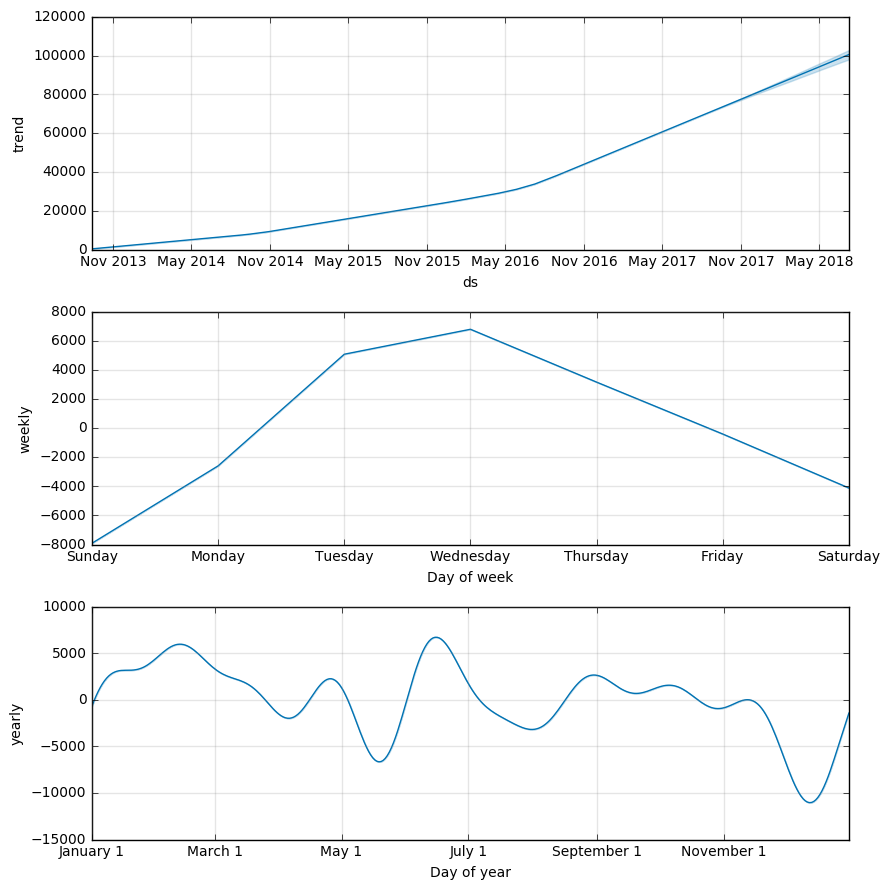

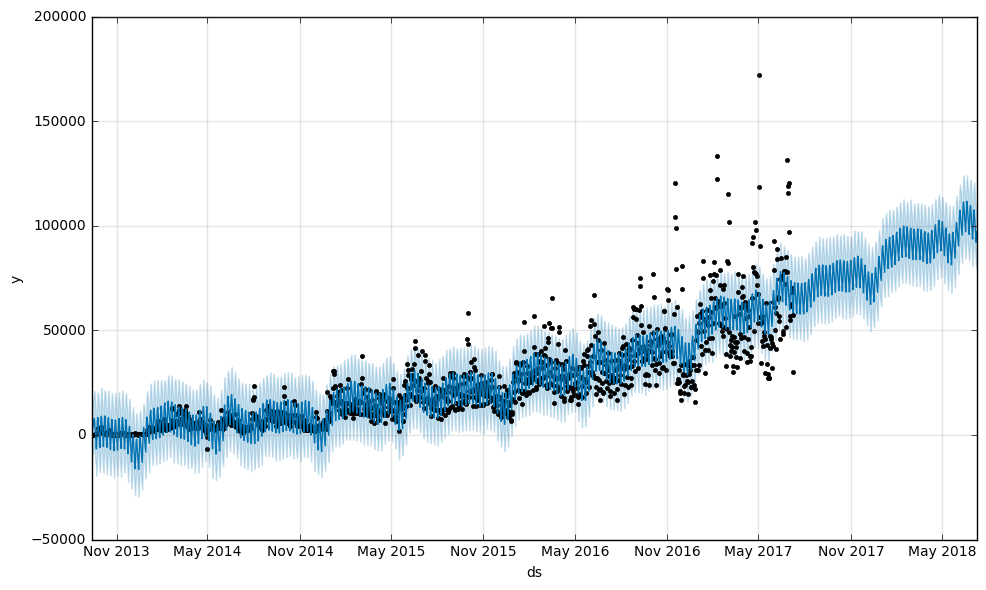

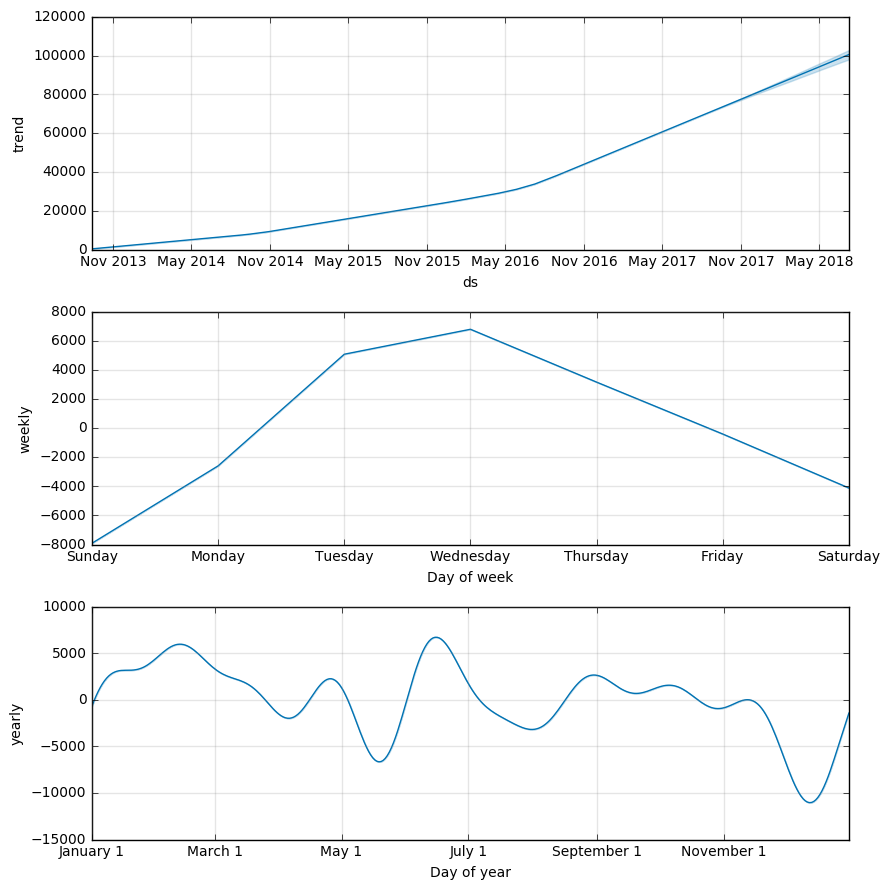

In [26]:
m = Prophet()

#temp_df = df.groupby('ds').sum().reset_index()
temp_df = df
m.fit(temp_df)
future = m.make_future_dataframe(periods = forecast_period)
forecast = m.predict(future)
m.plot(forecast)
m.plot_components(forecast)

In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(output_path)